In [3]:
%load_ext autoreload
%autoreload 2
%cd ..

/workspace/lung-segmentation


In [6]:
import glob

import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

from src.data.utils import *
from src.models.eval import *

In [5]:
def dice_coeff(input, target):
    if input.is_cuda:
        s = torch.FloatTensor(1).cuda().zero_()
    else:
        s = torch.FloatTensor(1).zero_()
    batch_size = input.shape[0]
    for i in range(batch_size):
        eps = 0.0001  # for numerical stability
        inter = torch.dot(input[i].reshape(-1), target[i].reshape(-1))
        union = torch.sum(input[i]) + torch.sum(target[i])  # not actually union
        s += (2 * inter.float() + eps) / (union + eps)
    return s / batch_size

tensor([0.9766])


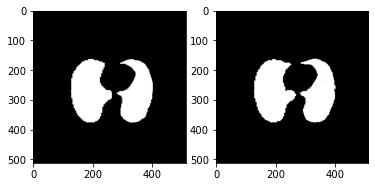

In [36]:
# test on individual masks
mask_path = glob.glob("data/raw/Thoracic_Cavities/LUNG1-001/*.nii.gz")[0]

mask1 = torch.from_numpy(read_seg_mask(mask_path, 60))
mask2 = torch.from_numpy(read_seg_mask(mask_path, 61))

print(dice_coeff(mask1.unsqueeze(0), mask2.unsqueeze(0)))
fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].imshow(mask1, cmap="gray")
axes[1].imshow(mask2, cmap="gray")

In [16]:
# test on batch
mask_path = glob.glob("data/raw/Thoracic_Cavities/LUNG1-001/*.nii.gz")[0]

mask1 = torch.from_numpy(read_seg_masks(mask_path))
mask2 = torch.from_numpy(read_seg_masks(mask_path))
# randomly shuffle slices
mask2 = mask2[torch.randperm(mask2.shape[0])]

In [17]:
print(dice_coeff(mask1, mask2))
print(dice_coeff_vectorized(mask1, mask2))

tensor([0.2870])
tensor(0.2870)


In [15]:
%timeit dice_coeff(mask1, mask2)

96.3 ms ± 1.36 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
%timeit dice_coeff_vectorized(mask1, mask2)

33.2 ms ± 587 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
